<a href="https://colab.research.google.com/github/mhabib80/Sample-Projects/blob/master/USCensus_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv('/content/drive/My Drive/Data Science/CodeAcademy/Random Forest Project/Random_Forrest_CSV.txt')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
data.columns = [c.strip() for c in data.columns]

In [ ]:
for col in data.columns:
  if data[col].dtype=='object':
    data[col] = data[col].str.strip()

# data[data.select_dtypes(include='object').columns] = data[data.select_dtypes(include='object').columns].apply(lambda x: x.str.strip())

In [ ]:
data['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [ ]:
y = data['income']
x = data[['age', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']]

In [ ]:
x['native-country'] = x['native-country'].apply(lambda x: 1 if x == 'United-States' else 0)
x['sex'] = x['sex'].apply(lambda x: 1 if x =='Male' else 0)
# y = y.apply(lambda x: 1 if x == r">50K" else 0)
# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()
# x['sex'] = le.fit_transform(x['sex'])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
x_train.shape[0] + x_test.shape[0] == x.shape[0]

True

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500)
rf.fit(x_train, y_train)
y_hat = rf.predict(x_test)
rf.score(x_test, y_test)

0.8246583755565792

In [ ]:
print(x.columns,rf.feature_importances_, sep ='\n' )

Index(['age', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
       'native-country'],
      dtype='object')
[0.31100027 0.06161133 0.29217151 0.11966073 0.20639197 0.00916419]


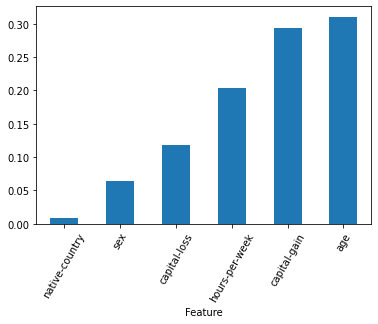

In [ ]:
pd.DataFrame(zip(x.columns, rf.feature_importances_), columns=['Feature', 'Importance']).set_index('Feature').sort_values('Importance').plot(kind='bar', rot=60, legend=False);